# Phishing email detection using Random Forest

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../RawData/PhishingEmailDetection/Phishing_Email.csv')

In [11]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [13]:
df.shape

(18650, 3)

Check if there's any NA values in the data, drop the row if there's any

In [12]:
df.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [15]:
df = df.dropna()
df.isna().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [16]:
df['Email Type'].value_counts()

Safe Email        11322
Phishing Email     7312
Name: Email Type, dtype: int64

There's an imbalance between safe email and phishing email. Safe email will be downsampled in order to have an equal representation of both classes.

In [18]:
safe_email = df[df['Email Type'] == 'Safe Email']
phishing_email = df[df['Email Type'] == 'Phishing Email']
print(safe_email.shape, phishing_email.shape)

(11322, 3) (7312, 3)


In [19]:
safe_email = safe_email.sample(phishing_email.shape[0])
print(safe_email.shape, phishing_email.shape)

(7312, 3) (7312, 3)


In [21]:
balanced_df = pd.concat([safe_email, phishing_email], ignore_index=True)
balanced_df.head()

,Unnamed: 0,Email Text,Email Type
0,10569,-----BEGIN PGP SIGNED MESSAGE-----\nHash: SHA1...,Safe Email
1,2178,research ' s summer outlook the research weath...,Safe Email
2,7122,"Well, from the looks of things, I can import a...",Safe Email
3,17945,"Once upon a time, Hesty wrote :> > Where you c...",Safe Email
4,17463,books and articles on cd-rom this text is also...,Safe Email


In [24]:
X = df['Email Text'].values
y = df['Email Type'].values

### Model training

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import Pipeline

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
y_train[2]

'Phishing Email'

Use tfidf to extract features from the email body text, and also eliminate all english stop words.

In [33]:
classifier = Pipeline([("tfidf",TfidfVectorizer(stop_words=list(ENGLISH_STOP_WORDS)) ),
                       ("classifier",RandomForestClassifier(n_estimators=10))])

In [34]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['along', 'becoming', 'seemed',
                                             'or', 'be', 'him', 'may',
                                             'himself', 'anyhow', 'because',
                                             'ours', 'hundred', 'why', 'herein',
                                             'an', 'un', 'thereby', 'her',
                                             'toward', 'moreover', 'and',
                                             'mine', 'beside', 'co', 'never',
                                             'out', 'six', 'somehow', 'also',
                                             'who', ...])),
                ('classifier', RandomForestClassifier(n_estimators=10))])

### Model evaluation

In [35]:
y_pred = classifier.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [53]:
print(f"accuracy from native bayes: {accuracy_score(y_test,y_pred)*100:.2f} %")
print("classification report :\n\n",classification_report(y_test,y_pred))

accuracy from native bayes: 95.09 %
classification report :

                 precision    recall  f1-score   support

Phishing Email       0.92      0.96      0.94      1457
    Safe Email       0.97      0.95      0.96      2270

      accuracy                           0.95      3727
     macro avg       0.95      0.95      0.95      3727
  weighted avg       0.95      0.95      0.95      3727



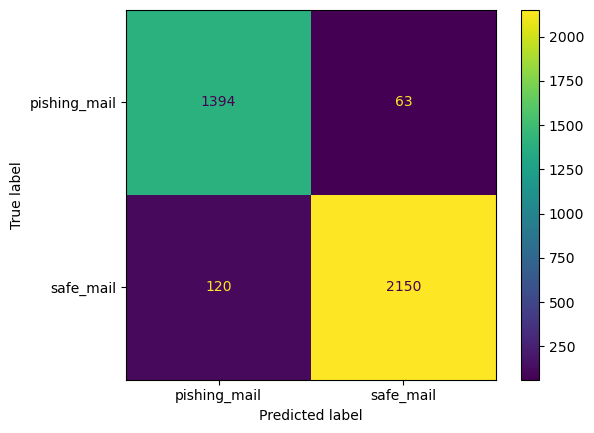

In [54]:
cm = confusion_matrix(y_test, y_pred)
cx_ = ConfusionMatrixDisplay(cm,display_labels=['pishing_mail','safe_mail']).plot()
plt.show()